In [1]:
from PIL import Image
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First part of the homework

In [2]:
num = None
rfnc_path_list = []
IMG_SIZE = (64, 64)
pred_l1 = {}

In [3]:
def input_num():
    global num
    num = input("請選擇想顯示之圖片編號(1-20):")
    try:
        if int(num) > 20 or int(num) < 0:
            print("invalid input, please resubmit your number")
            input_num()
    except:
        print("invalid input, please resubmit your number")
        input_num()

In [4]:
input_num()

請選擇想顯示之圖片編號(1-20):3


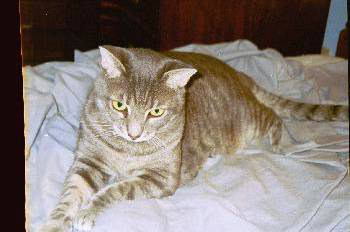

In [5]:
img_name = f"pic{num}.jpg"
path = os.path.join("test", img_name)
img = Image.open(path)
display(img)

In [6]:
for (root, dirs, files) in os.walk('reference', topdown=True):
    for names in files:
        rfnc_path_list.append(os.path.join(root, names))

In [7]:
img = img.resize(IMG_SIZE)
R, G, B = img.split()
R = np.array(np.asarray(R), dtype=np.float64)
G = np.array(np.asarray(G), dtype=np.float64)
B = np.array(np.asarray(B), dtype=np.float64)

In [8]:
for name in range(len(rfnc_path_list)):
    rfnc_img = Image.open(rfnc_path_list[name])
    rfnc_img = rfnc_img.resize(IMG_SIZE)
    r, g, b = rfnc_img.split()
    
    r = np.array(np.asarray(r), dtype=np.float64)
    g = np.array(np.asarray(g), dtype=np.float64)
    b = np.array(np.asarray(b), dtype=np.float64)
    
    l1 = 0
    for i in range(IMG_SIZE[0]):
        for j in range(IMG_SIZE[1]):
            l1 += (abs(R[i][j] - r[i][j]) + abs(G[i][j] - g[i][j]) + abs(B[i][j] - b[i][j])) / 64*64*3
            
    pred_l1[rfnc_path_list[name]] = l1

In [9]:
top3 = sorted(pred_l1, key=pred_l1.get, reverse=False)[:3]
print(top3)

['reference\\cats\\cat.29.jpg', 'reference\\cats\\cat.27.jpg', 'reference\\cats\\cat.14.jpg']


In [10]:
dog_count = 0
cat_count = 0
for name in top3:
    if name[10:13] == "cat":
        cat_count += 1
    if name[10:13] == 'dog':
        dog_count += 1
        
if dog_count > cat_count:
    print("This is a dog")
else:
    print("This is a cat")

This is a cat


Potential problems about the above approach to classify cats and dogs:
* 此方法只有將每個像素的顏色質做比較，假設貓和狗的毛色類似，相似程度就會相較比較高，且若背景顏色相似(eg:草地)，相似程度也會提高，進而影響模型判斷準確率。
* 只以顏色判斷無法得知圖片中的semantics，假設兩隻狗顏色相近但位置或坐姿有很大的差異(eg:一個趴著一個站著)，則會影響圖片準確率。

Second part of the homework

In [11]:
datas = pd.read_csv("HW1_data.csv")
datas = datas.to_numpy()

In [12]:
name_list = []
for name, attr, value in datas:
    if [name, 0, 0, 0, 0, 0, 0] not in name_list:
        name_list.append([name, 0, 0, 0, 0, 0, 0])

for name, attr, value in datas:
    for names in name_list:
        if name == names[0]:
            if attr == "Sex":
                names[1] = value
            elif attr == "Age":
                names[2] = value
            elif attr == "HR":
                names[3] = value
            elif attr == "Height":
                names[4] = value
            elif attr == "Weight":
                names[5] = value
            elif attr == "BP":
                names[6] = value

In [13]:
df = pd.DataFrame(np.array(name_list), columns = ['Name','Sex','Age', 'HR', 'Height', 'Weight', 'BP'])
df

,Name,Sex,Age,HR,Height,Weight,BP
0,Daniel,M,37,80,165,72,131
1,Avery,F,66,72,159,54,121
2,Joseph,M,42,0,168,70,110
3,Jackson,M,46,81,170,64,97
4,Nora,F,48,82,153,59,93
5,Aiden,M,38,93,166,69,136
6,Evelyn,F,60,67,168,60,106
7,Zoey,F,37,79,0,0,112
8,Matthew,M,69,85,166,70,128
9,Layla,F,12,87,156,47,142


In [14]:
df["Age"] = pd.to_numeric(df["Age"])
df["HR"] = pd.to_numeric(df["HR"])
df["Height"] = pd.to_numeric(df["Height"])
df["Weight"] = pd.to_numeric(df["Weight"])
df["BP"] = pd.to_numeric(df["BP"])

avg = ["Average", None]
for attr in df.columns[2:]:
    avg.append(df[attr].mean())

df_with_avg = df.append(pd.DataFrame(np.array([avg]), 
                        columns = ['Name','Sex','Age', 'HR', 'Height', 'Weight', 'BP']), 
                        ignore_index=True
    )
df_with_avg

,Name,Sex,Age,HR,Height,Weight,BP
0,Daniel,M,37,80,165,72,131
1,Avery,F,66,72,159,54,121
2,Joseph,M,42,0,168,70,110
3,Jackson,M,46,81,170,64,97
4,Nora,F,48,82,153,59,93
5,Aiden,M,38,93,166,69,136
6,Evelyn,F,60,67,168,60,106
7,Zoey,F,37,79,0,0,112
8,Matthew,M,69,85,166,70,128
9,Layla,F,12,87,156,47,142


In [15]:
df["Age"] = pd.to_numeric(df["Age"])
df["HR"] = pd.to_numeric(df["HR"])
df["Height"] = pd.to_numeric(df["Height"])
df["Weight"] = pd.to_numeric(df["Weight"])
df["BP"] = pd.to_numeric(df["BP"])

In [16]:
print(f"The oldest person: {df['Name'][df['Age'].idxmax()]}")
print(f"The person with highest HR: {df['Name'][df['HR'].idxmax()]}")
print(f"The person with highest Height: {df['Name'][df['Height'].idxmax()]}")
print(f"The person with highest Weight: {df['Name'][df['Weight'].idxmax()]}")
print(f"The person with highest BP: {df['Name'][df['BP'].idxmax()]}")

The oldest person: Madison
The person with highest HR: Liam
The person with highest Height: Mason
The person with highest Weight: Mason
The person with highest BP: Lucas


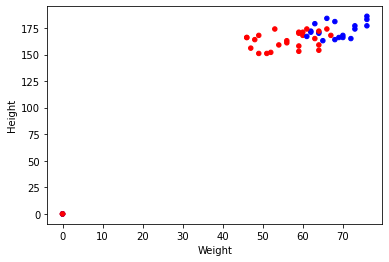

In [17]:
df_hw = df[['Height', 'Weight', 'Sex']]
colors = {'F': 'red', 'M': 'blue'}
df_hw.plot.scatter(x='Weight', y='Height', c=df['Sex'].apply(lambda x: colors[x]))
plt.show()

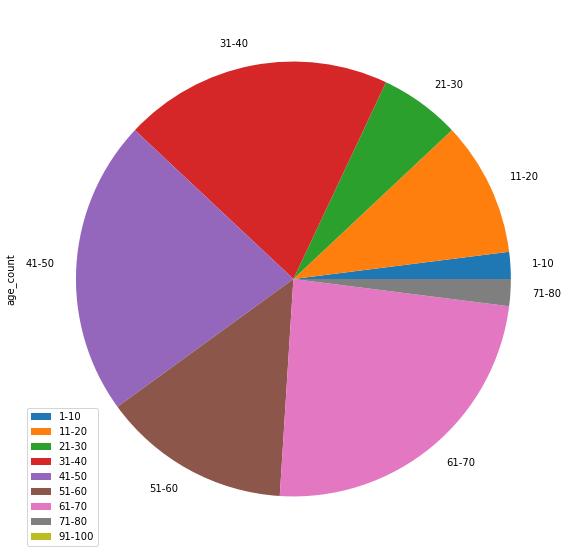

In [18]:
age_count = [0] * 9
age_range = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '91-100']
for age in df['Age']:
    if age % 10 == 0:
        age_count[(age//10)-1] += 1
    else:
        age_count[age//10] += 1

df_age = pd.DataFrame({'age_range': age_range, 'age_count': age_count})
df_age.groupby(['age_range']).sum().plot(kind='pie', y='age_count', figsize=(10, 10))
plt.show()

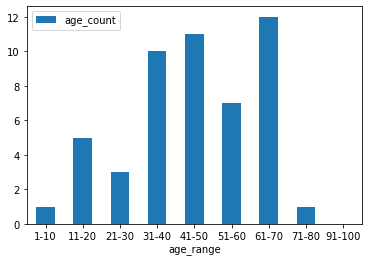

In [19]:
df_age.plot.bar(x='age_range', y='age_count', rot=0)
plt.show()

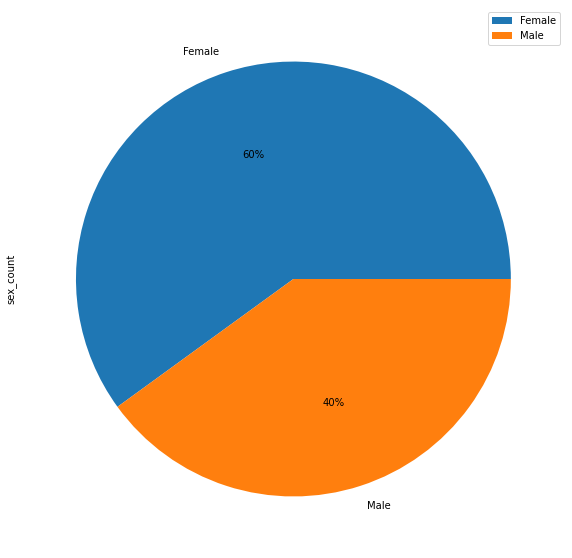

In [20]:
sex = ['Female', 'Male']
sex_count = df['Sex'].value_counts()

df_sex = pd.DataFrame({'Sex': sex, 'sex_count': sex_count})
df_sex.groupby(['Sex']).sum().plot(
    kind='pie', y='sex_count', autopct='%1.0f%%', figsize=(10, 10))
plt.show()